<a href="https://colab.research.google.com/github/kashyab12/Vaccine-Distribution/blob/main/VaccineDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Statements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

#Importing the Data Set

> COVID-19 Data for the United States via [Our World In Data](https://ourworldindata.org/covid-vaccinations)



In [ ]:
# Importing the Data
df = pd.read_csv('covid19-data.csv')
# Validating Import
print(df)

    iso_code      continent  ... human_development_index excess_mortality
0        USA  North America  ...                   0.926              NaN
1        USA  North America  ...                   0.926              NaN
2        USA  North America  ...                   0.926              NaN
3        USA  North America  ...                   0.926              NaN
4        USA  North America  ...                   0.926             0.75
..       ...            ...  ...                     ...              ...
601      USA  North America  ...                   0.926              NaN
602      USA  North America  ...                   0.926              NaN
603      USA  North America  ...                   0.926              NaN
604      USA  North America  ...                   0.926              NaN
605      USA  North America  ...                   0.926              NaN

[606 rows x 62 columns]


#People Vaccinated Per Hundred vs Time

In [ ]:
# Parsing the People Vaccinate Per Hundred
ppl_vaccinated_per_hund = df.people_vaccinated_per_hundred.dropna()
# Validating
print(ppl_vaccinated_per_hund)

333     0.17
334     0.18
336     0.30
339     0.58
341     0.63
       ...  
601    62.43
602    62.55
603    62.65
604    62.77
605    62.88
Name: people_vaccinated_per_hundred, Length: 254, dtype: float64


In [ ]:
# Parsing the dates corresponding to the people vaccinated per hundred
df['date'] = pd.to_datetime(df['date']) 
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
ppl_vaccinated_per_hund_date  = [df.loc[df.people_vaccinated_per_hundred == per, 'date_delta'] for per in ppl_vaccinated_per_hund]
# Validating
print(ppl_vaccinated_per_hund_date)

[333    333.0
Name: date_delta, dtype: float64, 334    334.0
Name: date_delta, dtype: float64, 336    336.0
Name: date_delta, dtype: float64, 339    339.0
Name: date_delta, dtype: float64, 341    341.0
Name: date_delta, dtype: float64, 343    343.0
Name: date_delta, dtype: float64, 346    346.0
Name: date_delta, dtype: float64, 348    348.0
Name: date_delta, dtype: float64, 349    349.0
Name: date_delta, dtype: float64, 350    350.0
Name: date_delta, dtype: float64, 351    351.0
Name: date_delta, dtype: float64, 352    352.0
Name: date_delta, dtype: float64, 355    355.0
Name: date_delta, dtype: float64, 356    356.0
Name: date_delta, dtype: float64, 358    358.0
Name: date_delta, dtype: float64, 359    359.0
Name: date_delta, dtype: float64, 363    363.0
Name: date_delta, dtype: float64, 364    364.0
Name: date_delta, dtype: float64, 365    365.0
Name: date_delta, dtype: float64, 366    366.0
Name: date_delta, dtype: float64, 367    367.0
Name: date_delta, dtype: float64, 368    368.0

In [ ]:
# Converting parsed data into a numpy array
ppl_vaccinated_per_hund = ppl_vaccinated_per_hund.to_numpy()
ppl_vaccinated_per_hund_date = np.array(ppl_vaccinated_per_hund_date)
ppl_vaccinated_per_hund_date = ppl_vaccinated_per_hund_date.reshape(254)

print(ppl_vaccinated_per_hund)
print(ppl_vaccinated_per_hund_date)

[ 0.17  0.18  0.3   0.58  0.63  0.83  1.26  1.36  1.44  1.58  1.76  1.99
  2.67  2.77  2.88  3.15  4.04  4.24  4.48  4.83  5.17  5.5   5.72  5.92
  6.15  6.45  6.8   7.16  7.49  7.74  7.86  8.07  8.3   8.6   8.99  9.39
  9.62  9.77 10.04 10.32 10.65 11.02 11.39 11.8  11.97 12.2  12.48 12.73
 12.97 13.12 13.24 13.45 13.7  14.03 14.4  14.8  15.08 15.39 15.72 16.07
 16.52 17.05 17.51 17.84 18.16 18.57 19.05 19.61 20.48 20.75 21.13 21.45
 21.9  22.45 22.96 23.6  24.21 24.61 24.96 25.41 25.97 26.63 27.27 27.84
 28.25 28.56 29.02 29.6  30.27 30.99 31.58 31.97 32.2  32.71 33.32 34.03
 34.83 35.45 35.93 36.36 36.84 37.41 37.98 38.5  39.02 39.34 39.62 39.97
 40.37 40.8  41.22 41.62 41.91 42.15 42.43 42.75 43.08 43.48 43.72 43.86
 43.97 44.17 44.44 44.72 44.99 45.23 45.44 45.63 45.79 45.97 46.16 46.45
 46.72 46.93 47.09 47.33 47.63 47.95 48.31 48.56 48.73 48.87 49.08 49.27
 49.47 49.7  49.87 50.1  50.17 50.28 50.47 50.63 50.79 50.94 51.06 51.16
 51.27 51.37 51.55 51.69 51.81 51.94 52.05 52.29 52

#Plotting the relation

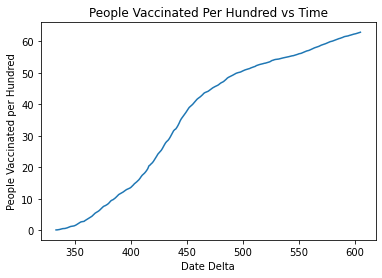

In [ ]:
plt.title("People Vaccinated Per Hundred vs Time") 
plt.xlabel("Date Delta") 
plt.ylabel("People Vaccinated per Hundred") 
plt.plot(ppl_vaccinated_per_hund_date,ppl_vaccinated_per_hund) 
plt.show()

#Linear Regression via ordinary LSM

##Import Statements

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

##Splitting training and testing set

In [ ]:
# Split the data into training/testing sets
date_x_train = ppl_vaccinated_per_hund_date[:-20]
date_x_test = ppl_vaccinated_per_hund_date[-20:]

# Split the targets into training/testing sets
vacc_y_train = ppl_vaccinated_per_hund[:-20]
vacc_y_test = ppl_vaccinated_per_hund[-20:]

# Reshaping Data
date_x_train = date_x_train.reshape(-1, 1)
date_x_test = date_x_test.reshape(-1, 1)

vacc_y_train = vacc_y_train.reshape(-1, 1)
vacc_y_test = vacc_y_test.reshape(-1, 1)

# Validating

print(date_x_train)

[[333.]
 [334.]
 [336.]
 [339.]
 [341.]
 [343.]
 [346.]
 [348.]
 [349.]
 [350.]
 [351.]
 [352.]
 [355.]
 [356.]
 [358.]
 [359.]
 [363.]
 [364.]
 [365.]
 [366.]
 [367.]
 [368.]
 [369.]
 [370.]
 [371.]
 [372.]
 [373.]
 [374.]
 [375.]
 [376.]
 [377.]
 [378.]
 [379.]
 [380.]
 [381.]
 [382.]
 [383.]
 [384.]
 [385.]
 [386.]
 [387.]
 [388.]
 [389.]
 [391.]
 [392.]
 [393.]
 [394.]
 [395.]
 [396.]
 [397.]
 [398.]
 [399.]
 [400.]
 [401.]
 [402.]
 [403.]
 [404.]
 [405.]
 [406.]
 [407.]
 [408.]
 [409.]
 [410.]
 [411.]
 [412.]
 [413.]
 [414.]
 [415.]
 [416.]
 [417.]
 [418.]
 [419.]
 [420.]
 [421.]
 [422.]
 [423.]
 [424.]
 [425.]
 [426.]
 [427.]
 [428.]
 [429.]
 [430.]
 [431.]
 [432.]
 [433.]
 [434.]
 [435.]
 [436.]
 [437.]
 [438.]
 [439.]
 [440.]
 [441.]
 [442.]
 [443.]
 [444.]
 [445.]
 [446.]
 [447.]
 [448.]
 [449.]
 [450.]
 [451.]
 [452.]
 [453.]
 [454.]
 [455.]
 [456.]
 [457.]
 [458.]
 [459.]
 [460.]
 [461.]
 [462.]
 [463.]
 [464.]
 [465.]
 [466.]
 [467.]
 [468.]
 [469.]
 [470.]
 [471.]
 [472.]


##Initializing Model and Training

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(date_x_train, vacc_y_train)

# Make predictions using the testing set
vacc_y_pred = regr.predict(date_x_test)

##Outputting model coefficients, MSE, and $R^2$

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(vacc_y_test, vacc_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(vacc_y_test, vacc_y_pred))

Coefficients: 
 [[0.2772324]]
Mean squared error: 104.76
Coefficient of determination: -219.71


##Plotting the predicted values vs the test set

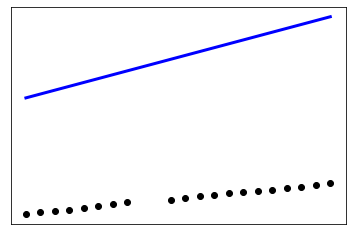

In [ ]:
plt.scatter(date_x_test, vacc_y_test,  color='black')
plt.plot(date_x_test, vacc_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()